In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
'''
 *** To be completed by the student
'''

'\n *** To be completed by the student\n'

In [60]:
pip install mlxtend

In [61]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [62]:
#Create dataframe and explore the features

#Loading the dataset
diabetes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataMining/lab09/diabetesdata.csv')
'''
basic statistic details about the data (note only numerical columns would be displayed here unless parameter include="all")
for reference: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe

'''
# show the summary statistics
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


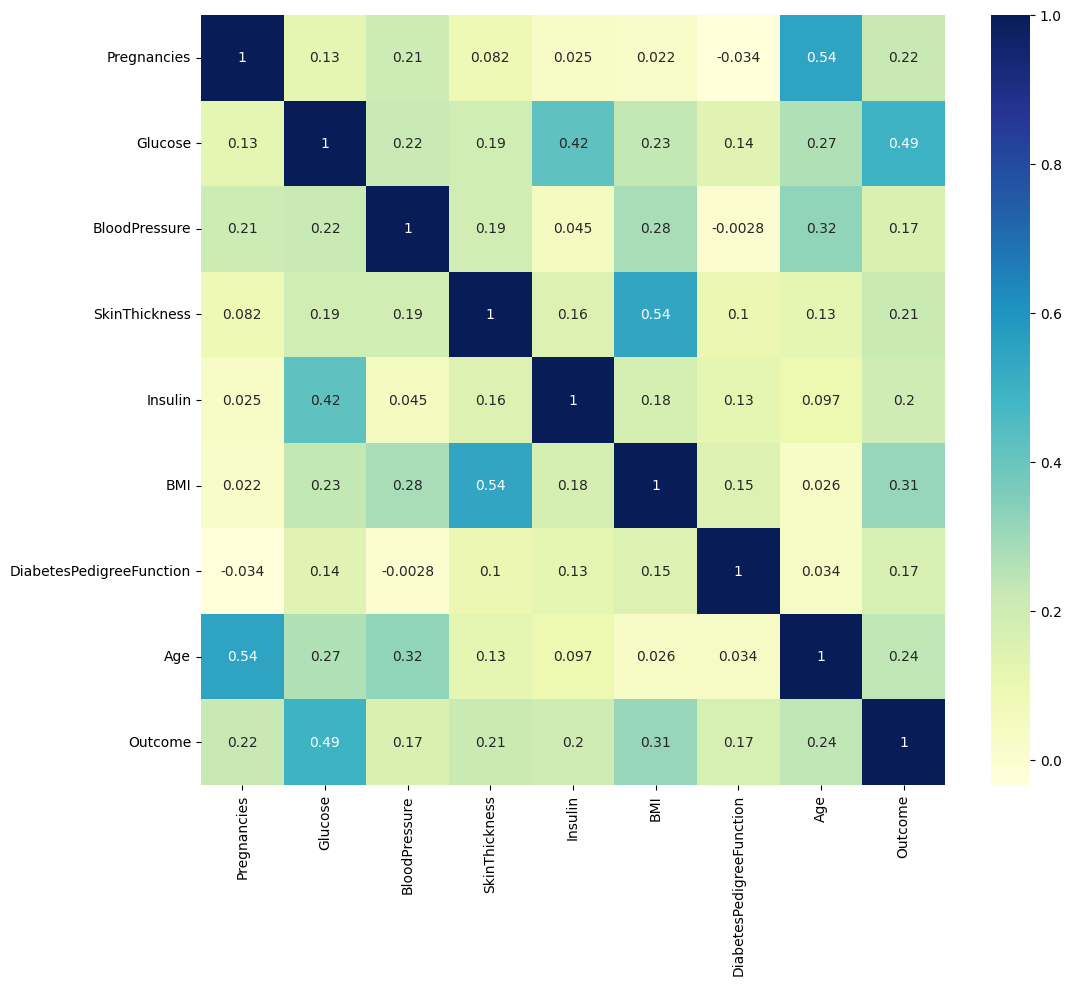

In [63]:
#Task 1
plt.figure(figsize=(12,10))  # Set the size of figure to 12 by 10.
p=sns.heatmap(diabetes.corr(), annot=True,cmap ='YlGnBu')

Outcome
0    500
1    268
Name: count, dtype: int64


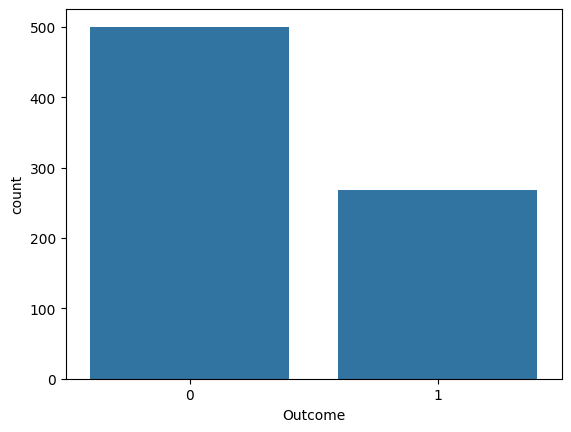

In [64]:
#Task 2
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#ff2900", 2: "#12ed27"}
colors = diabetes["Outcome"].map(lambda x: color_wheel.get(x + 1))
#print number of instances in each class
print(diabetes.Outcome.value_counts())
#Visualsie the number of instances in each class using bar plot
sns.countplot(x='Outcome',data = diabetes)
plt.show()

In [65]:
#Task 3
#sc_X = StandardScaler()
# Define the input and target variables

#X =  pd.DataFrame(sc_X.fit_transform(diabetes.drop(["Outcome"],axis = 1),),
#        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#       'BMI', 'DiabetesPedigreeFunction', 'Age']) #Input
# #Target/class
#y = diabetes['Outcome']
#X.head()


Scaler = StandardScaler()
X = diabetes.drop('Outcome',axis=1)
y  = diabetes['Outcome']
x_scaled = Scaler.fit_transform(X)


In [66]:
#Task 4
#using train_test_split to create train and test sets

X_train,X_test,y_train,y_test = train_test_split(x_scaled, y, test_size=0.3,stratify=y, random_state=42)

In [67]:
#Task 5
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

## Find the max score from the same data points that were used for training
max_train_score = max(train_scores)
print('Max train score {} % '.format(max_train_score*100))

Max train score 100.0 % 


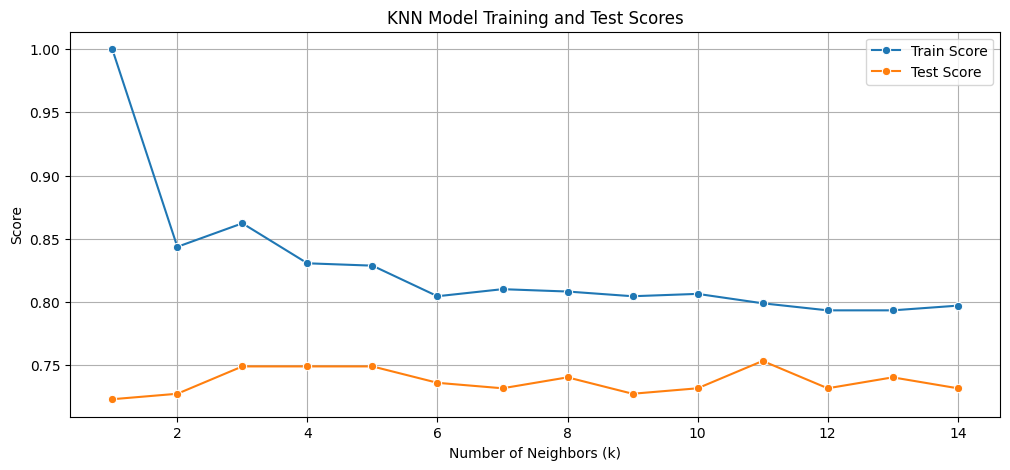

In [68]:
#Task 6 plot both train and test scores
plt.figure(figsize=(12,5))
#p = sns.lineplot(***) #train score
#p = sns.lineplot(***) #test score



# Plot training scores
sns.lineplot(x=range(1, 15), y=train_scores, label='Train Score', marker='o')

# Plot test scores
sns.lineplot(x=range(1, 15), y=test_scores, label='Test Score', marker='o')


# Set the labels and title
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('KNN Model Training and Test Scores')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
#Task 7
#Pass the best k from task 6 to create the final KNN
#knn = KNeighborsClassifier(k)
#knn.fit(***)
#knn.score(***) # get the score

# Define the best k value (replace 7 if another k is determined to be better)
k = 11

# Create the KNN classifier with the best k
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model on the training data
knn.fit(X_train, y_train)

# Get the accuracy score of the model on the test data
test_score = knn.score(X_test, y_test)

print('Test score with k = {}: {:.2f}%'.format(k, test_score * 100))


Test score with k = 11: 75.32%


Predicted,0,1,All
True,,,
0,127,23,150
1,34,47,81
All,161,70,231


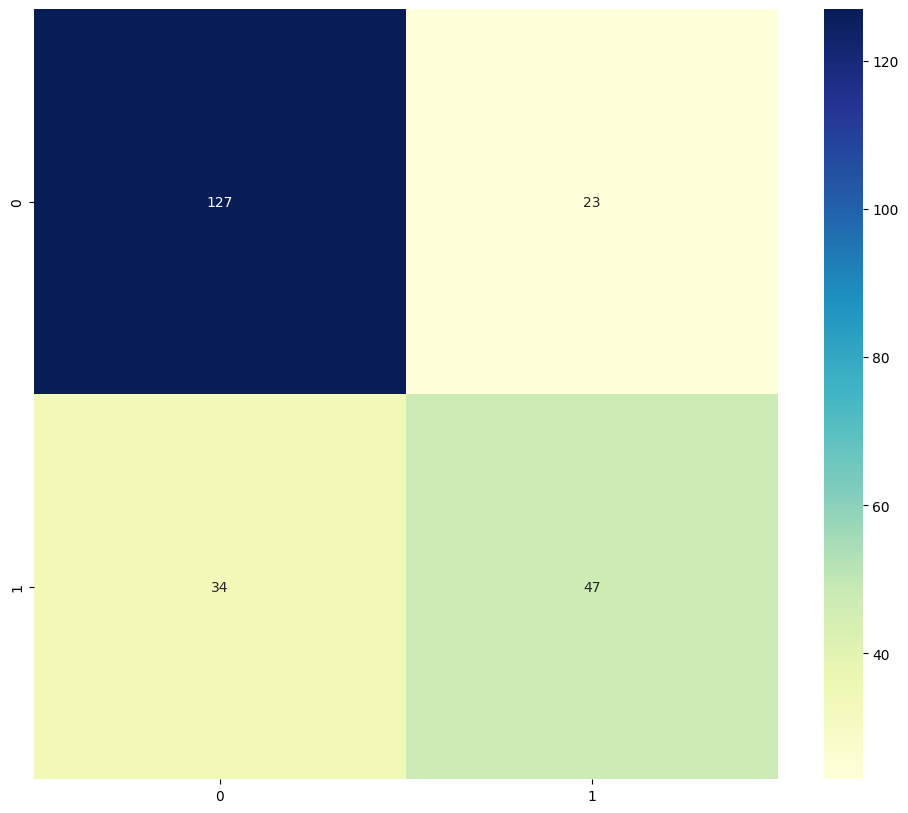

In [70]:
#Task 8 (1)
# get the predictions using task 7 classifier
y_pred = knn.predict(X_test)
#create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,10))  # Set the size of figure to 12 by 10.
p=sns.heatmap(cm, annot=True,cmap ='YlGnBu',fmt='d')

# Use andas crosstab to from cross-tabulation of three columns (0, 1 and ALL)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Text(0.5, 23.52222222222222, 'Predicted label')

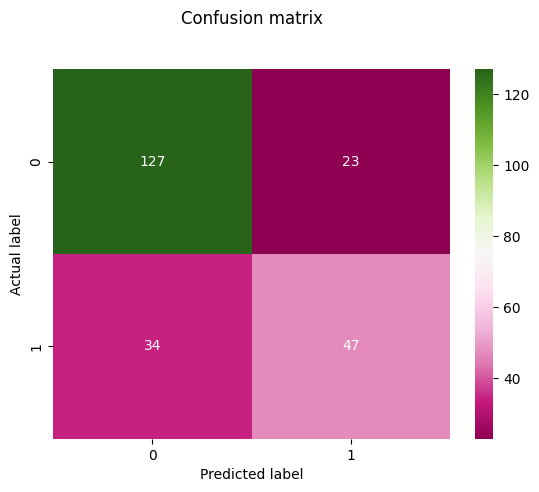

In [71]:
#Task 8 (2)
y_pred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="PiYG" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [74]:
# Task 9: Generate classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

Accuracy: 0.7532467532467533
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       150
           1       0.67      0.58      0.62        81

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



In [73]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 75.32 %.
